In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pylab as plt
import pylab
import scipy. stats as stats
import warnings
warnings. filterwarnings("ignore")
from sklearn. model_selection import train_test_split
from sklearn. metrics import accuracy_score

In [2]:
df = pd. read_csv("E:\LiveProject\Virtual Reality Experiences\data.csv")

In [3]:
df. head()

,UserID,Age,Gender,VRHeadset,Duration,MotionSickness,ImmersionLevel
0,1,40,Male,HTC Vive,13.598508,8,5
1,2,43,Female,HTC Vive,19.950815,2,2
2,3,27,Male,PlayStation VR,16.543387,4,2
3,4,33,Male,HTC Vive,42.574083,6,3
4,5,51,Male,PlayStation VR,22.452647,4,2


In [4]:
df = df. drop(["UserID"], axis = 1)

In [5]:
df. dtypes

Age                 int64
Gender             object
VRHeadset          object
Duration          float64
MotionSickness      int64
ImmersionLevel      int64
dtype: object

In [6]:
df. duplicated(). sum()

0

In [7]:
df. isna(). sum()

Age               0
Gender            0
VRHeadset         0
Duration          0
MotionSickness    0
ImmersionLevel    0
dtype: int64

In [8]:
df. mean()

Age               39.17800
Duration          32.57666
MotionSickness     5.52600
ImmersionLevel     2.97600
dtype: float64

In [9]:
df. Gender. mode()

0    Other
Name: Gender, dtype: object

In [10]:
df. VRHeadset. mode()

0    Oculus Rift
Name: VRHeadset, dtype: object

In [11]:
df. skew(skipna = True, axis = 0)

Age               0.050586
Duration         -0.022004
MotionSickness   -0.029543
ImmersionLevel    0.018961
dtype: float64

In [12]:
df. kurtosis(skipna = True, axis = 0)

Age              -1.135870
Duration         -1.174970
MotionSickness   -1.191796
ImmersionLevel   -1.300760
dtype: float64

<AxesSubplot: title={'center': 'Age Distribution'}, ylabel='Density'>

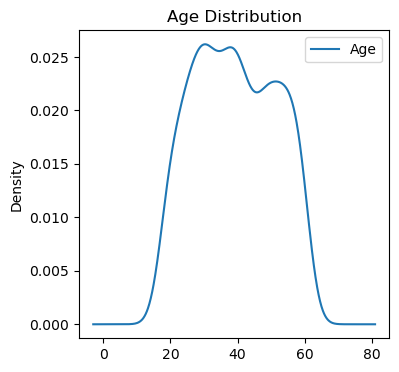

In [13]:
df. Age. plot(kind = 'kde', figsize = (4,4), legend = True, title = "Age Distribution")

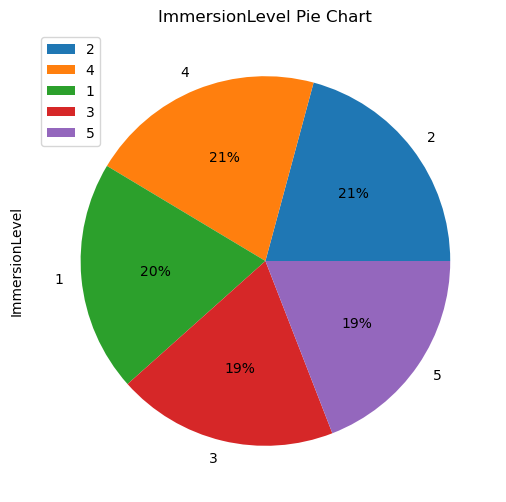

In [14]:
df.ImmersionLevel.value_counts().plot(kind="pie", autopct="%1.0f%%", title="ImmersionLevel Pie Chart", legend=True, figsize=(8,6))
plt.show()

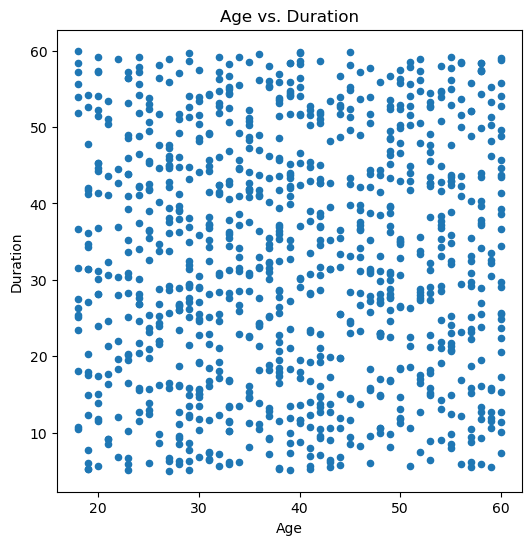

In [15]:
# Scatter plot for 'Age' and 'Duration'
df.plot.scatter(x='Age', y='Duration', figsize=(6, 6))
plt.title("Age vs. Duration")
plt.show()

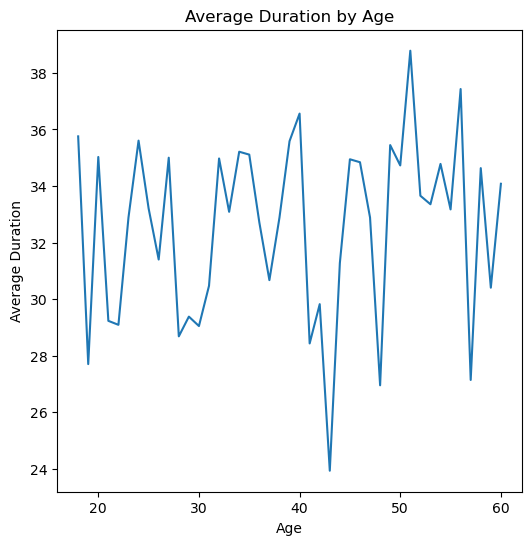

In [16]:
## Line plot
avg_duration = df.groupby('Age')['Duration'].mean()

avg_duration.plot(figsize=(6, 6))
plt.title("Average Duration by Age")
plt.xlabel("Age")
plt.ylabel("Average Duration")
plt.show()

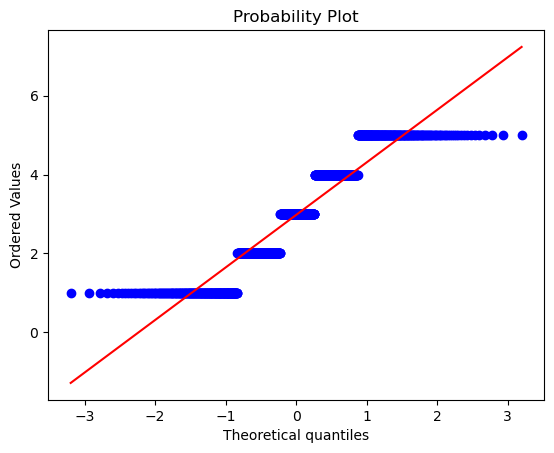

In [17]:
stats. probplot(df["ImmersionLevel"], dist = "norm", plot = pylab);plt.show()

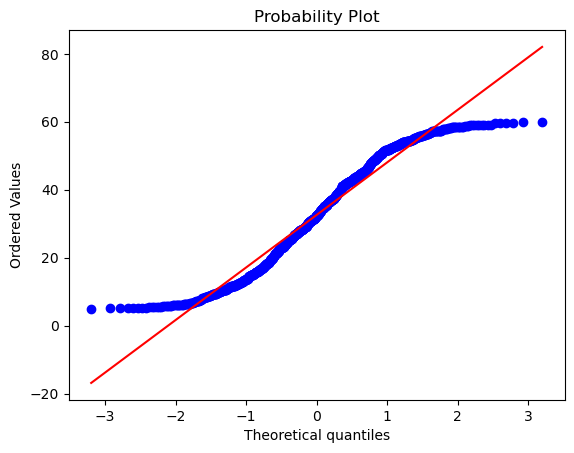

In [18]:
stats. probplot(df["Duration"], dist = "norm", plot = pylab);plt.show()

In [19]:
df. ImmersionLevel. value_counts(normalize = True)

2    0.208
4    0.206
1    0.202
3    0.193
5    0.191
Name: ImmersionLevel, dtype: float64

<AxesSubplot: xlabel='Gender', ylabel='count'>

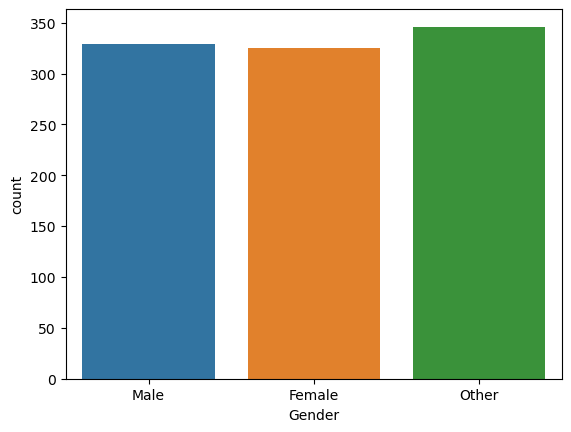

In [20]:
sns. countplot(x = df["Gender"])

<AxesSubplot: xlabel='VRHeadset', ylabel='count'>

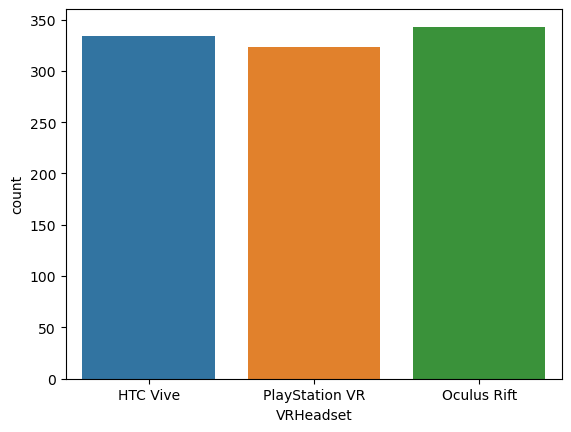

In [21]:
sns. countplot(x = df["VRHeadset"])

In [22]:
df. VRHeadset. value_counts()

Oculus Rift       343
HTC Vive          334
PlayStation VR    323
Name: VRHeadset, dtype: int64

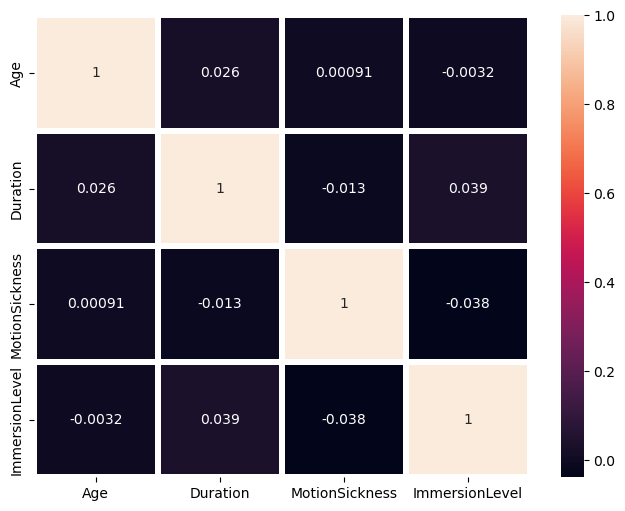

In [23]:
#Heatmap Creation using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, linewidth=3)
plt.show()

In [24]:
mapping = {"Male":1, "Female":2, "Other":3}

In [25]:
df["Gender"] = df["Gender"]. map(mapping)

In [26]:
mapping = {"Oculus Rift":1, "HTC Vive":2, "PlayStation VR":3}

In [27]:
df["VRHeadset"] = df["VRHeadset"]. map(mapping)

In [28]:
df. head()

,Age,Gender,VRHeadset,Duration,MotionSickness,ImmersionLevel
0,40,1,2,13.598508,8,5
1,43,2,2,19.950815,2,2
2,27,1,3,16.543387,4,2
3,33,1,2,42.574083,6,3
4,51,1,3,22.452647,4,2


In [30]:
df. describe()

,Age,Gender,VRHeadset,Duration,MotionSickness,ImmersionLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.178000,2.017000,1.980000,32.576660,5.526000,2.976000
std,12.050208,0.821819,0.816251,15.764659,2.866625,1.409756
min,18.000000,1.000000,1.000000,5.008672,1.000000,1.000000
25%,29.000000,1.000000,1.000000,18.733748,3.000000,2.000000
50%,39.000000,2.000000,2.000000,32.368611,6.000000,3.000000
75%,49.000000,3.000000,3.000000,45.343732,8.000000,4.000000
max,60.000000,3.000000,3.000000,59.983723,10.000000,5.000000


In [31]:
X = df. drop(["ImmersionLevel"], axis = 1)

In [32]:
y = df['ImmersionLevel']

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
# Scale the training features
X_train_scaled = scaler.fit_transform(X_train)

In [37]:
# Scale the testing features
X_test_scaled = scaler.transform(X_test)

In [39]:
import xgboost as xgb
# Create an XGBoost regressor
xgbr = xgb.XGBRegressor()

In [40]:
# Fit the regressor to the scaled training data
xgbr.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [41]:
# Make predictions on the scaled test set
y_pred = xgbr.predict(X_test_scaled)

In [43]:
from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.0605649846788516


In [44]:
y_pred_train = xgbr. predict(X_train_scaled)

In [45]:
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04804559120751779


In [46]:
from sklearn.metrics import mean_absolute_percentage_error
# Calculate the MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 0.7968502346674602


In [47]:
import pickle
pickle.dump(xgbr, open("Virtual_Reality_Expr.pickle", "wb"))

In [48]:
pickle.dump(scaler, open("MinMaxScaler.pickle", "wb"))